In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import matplotlib.ticker as mtick
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from pyne import serpent
from pyne import nucname
from sklearn.linear_model import LinearRegression
from scipy import stats

colors = matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color']

def read_calc_tc(f_str, T, void_per):  
    res = serpent.parse_res(f_str, write_py=False)
    ftc_k = []
    mtc_k = []
    itc_k = []
    ftc_k_e = []
    mtc_k_e = []
    itc_k_e = []
    void_k = []
    void_k_e = []
    
    # FTC
    for i in [1,2,0,3,4]:
        ftc_k.append(res['IMP_KEFF'][i,0])
        ftc_k_e.append(res['IMP_KEFF'][i,1])
    for i in [5,6,0,7,8]:
        mtc_k.append(res['IMP_KEFF'][i,0])
        mtc_k_e.append(res['IMP_KEFF'][i,1])
    for i in [9,10,0,11,12]:
        itc_k.append(res['IMP_KEFF'][i,0])
        itc_k_e.append(res['IMP_KEFF'][i,1])
    for i in [0, 13, 14, 15, 16]:
        void_k.append(res['IMP_KEFF'][i,0])
        void_k_e.append(res['IMP_KEFF'][i,1])    
          
    ftc_r = stats.linregress(T, ftc_k)
    mtc_r = stats.linregress(T, mtc_k)
    itc_r = stats.linregress(T, itc_k)
    void_r = stats.linregress(void_per, void_k)
    
    ftc_err = math.sqrt(ftc_k_e[2]**2/ftc_k[2]**4 + ftc_k_e[4]**2/ftc_k[4]**4) * \
            abs(1/(T[2]-T[4]))
    mtc_err = math.sqrt(mtc_k_e[2]**2/mtc_k[2]**4 + mtc_k_e[4]**2/mtc_k[4]**4) * \
            abs(1/(T[2]-T[4]))
    itc_err = math.sqrt(itc_k_e[2]**2/itc_k[2]**4 + itc_k_e[4]**2/itc_k[4]**4) * \
            abs(1/(T[2]-T[4]))
    void_err = math.sqrt(void_k_e[0]**2/void_k[0]**4 + void_k_e[-1]**2/void_k[-1]**4) * \
            abs(1/(void_per[0]-void_per[-1]))
    
    crw = abs(res['IMP_KEFF'][-1,0] - res['IMP_KEFF'][0,0])
    crw_err = math.sqrt(res['IMP_KEFF'][-1,1]**2/res['IMP_KEFF'][-1,0]**4 + res['IMP_KEFF'][0,1]**2/res['IMP_KEFF'][0,0]**4)
    crw_2_err = abs(1/res['FWD_ANA_BETA_ZERO'][-1,0]) * math.sqrt(res['IMP_KEFF'][-1,1]**2/res['IMP_KEFF'][-1,0]**4 + res['IMP_KEFF'][0,1]**2/res['IMP_KEFF'][0,0]**4)
    #ftc_a = [1e5*ftc_r.slope, 1e5*ftc_err]
    #mtc_a = [1e5*mtc_r.slope, 1e5*mtc_err]
    #itc_a = [1e5*itc_r.slope, 1e5*itc_err]
    ftc_a = [1e5*(ftc_k[2] - ftc_k[4]) / ((T[2]-T[4])), 1e5*ftc_err]
    mtc_a = [1e5*(mtc_k[2] - mtc_k[4]) / ((T[2]-T[4])), 1e5*mtc_err]
    itc_a = [1e5*(itc_k[2] - itc_k[4]) / ((T[2]-T[4])), 1e5*itc_err]
    crw_a = [1e5*crw, 1e5*crw_err]
    crw_d_a = [crw/res['FWD_ANA_BETA_ZERO'][-1,0], crw_2_err]
    void_a = [1e5*void_r.slope, 1e5*void_err]
    return ftc_a, mtc_a, itc_a, crw_a, crw_d_a, void_a

/home/andrei2/anaconda3/envs/py35/lib/python3.5/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


In [2]:
out_f_list = np.array([0, 0.5, 1, 7.5, 12], dtype=np.int)
T = np.array([800, 850, 900, 950, 1000])
void_percent = np.linspace(0, 2, 5)
#f_list = ['../../../msbr/safety_analysis/large_eps/eol/jeff_0hr/msbr_safety_param_jeff_res.m'
#         ]
f_list_eol = ['../../../msbr/safety_analysis/large_eps/eol/jeff_0hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/large_eps/eol/0_5hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/large_eps/eol/1hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/large_eps/eol/7_5hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/large_eps/eol/12hr/msbr_safety_param_jeff_res.m'
         ]

f_list_bol = ['../../../msbr/safety_analysis/large_eps/bol/0hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/large_eps/bol/0_5hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/large_eps/bol/1hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/large_eps/bol/7_5hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/large_eps/bol/12hr/msbr_safety_param_jeff_res.m'
         ]

f_list_eol = ['../../../msbr/safety_analysis/mid_eps/eol/0hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/mid_eps/eol/0_5hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/mid_eps/eol/1hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/mid_eps/eol/7_5hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/mid_eps/eol/12hr/msbr_safety_param_jeff_res.m'
         ]

f_list_bol = ['../../../msbr/safety_analysis/mid_eps/bol/0hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/mid_eps/bol/0_5hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/mid_eps/bol/1hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/mid_eps/bol/7_5hr/msbr_safety_param_jeff_res.m',
          '../../../msbr/safety_analysis/mid_eps/bol/12hr/msbr_safety_param_jeff_res.m'
         ]


ftc_l = []
mtc_l = []
itc_l = []
crw_l = []
void_l = []
for file in f_list_eol:
    ftc, mtc, itc, crw,_, void = read_calc_tc(file, T, void_percent)
    ftc_l.append(ftc)
    mtc_l.append(mtc)
    itc_l.append(itc)
    crw_l.append(crw)
    void_l.append(void)
ftc_plot = np.asarray(ftc_l)
mtc_plot = np.asarray(mtc_l)
itc_plot = np.asarray(itc_l)
crw_plot = np.asarray(crw_l)
void_plot = np.asarray(void_l)
del ftc_l, mtc_l, itc_l, crw_l, void_l
ftc_l = []
mtc_l = []
itc_l = []
crw_l = []
void_l = []

for file in f_list_bol:
    ftc1, mtc1, itc1, crw1,_, void1 = read_calc_tc(file, T, void_percent)
    ftc_l.append(ftc1)
    mtc_l.append(mtc1)
    itc_l.append(itc1)
    crw_l.append(crw1)
    void_l.append(void1)
ftc_plot_bol = np.asarray(ftc_l)
mtc_plot_bol = np.asarray(mtc_l)
itc_plot_bol = np.asarray(itc_l)
crw_plot_bol = np.asarray(crw_l)
void_plot_bol = np.asarray(void_l)

In [ ]:
res = serpent.parse_res(f_list_eol[0], write_py=False)
keff = 1e5*res['IMP_KEFF'][:,0]         # K-eff parsing from dictionary
keff_err = 1e5*res['IMP_KEFF'][:,1]         # K-eff standart deviation

beff = res['FWD_ANA_BETA_ZERO'][-1,0]         # K-eff parsing from dictionary
beff_err = res['FWD_ANA_BETA_ZERO'][-1,1]         # K-eff parsing from dictionary

# T = np.array([800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200])
T = np.array([800, 850, 900, 950, 1000])
fuel_den = 6.105-0.001272*np.asarray(T)
print ('Fuel density', fuel_den, ' for temperature       ', T)

# dT = [80, 80, 80, 20, 20, 20]
print('\nnom ftc800 ftc850 ftc950 ftc1000 ftc1050 ftc1100 ftc1150 ftc1200 mtc800 mtc850 mtc950 mtc1000 mtc1050 mtc1100 mtc1150 mtc1200 itc800 itc850 itc950 itc1000 itc1050 itc1100 itc1150 itc1200 crw0')
print('Multiplication factor', keff)
print('STD for Keff', keff_err)

# FTC total
ftc_k = []
f_k = []
ftc_k_e = []
for i in [1,2,0,3,4]:
    f_k.append(keff[i])
    ftc_k.append(keff[i]-keff[0])
    ftc_k_e.append(keff_err[i])

# MTC total
mtc_k = []
mtc_k_e = []
for i in [5,6,0,7,8]:
    mtc_k.append(keff[i]-keff[0])
    mtc_k_e.append(keff_err[i])
# ITC
itc_k = []
itc_k_e = []
for i in [9,10,0,11,12]:
    itc_k.append(keff[i]-keff[0])
    itc_k_e.append(keff_err[i])

ftc_r = stats.linregress(T, ftc_k)
mtc_r = stats.linregress(T, mtc_k)
itc_r = stats.linregress(T, itc_k)

    
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('T [K]')
ax1.set_ylabel(r'$\rho$ [$pcm$]') #, color='b', fontsize=14)
#ax1.tick_params('y') #, colors='b')
ax1.set_xlim(798,1002)
ax1.plot(T, ftc_k, 's-',label=r'$\rho (T_F)$', markerfacecolor="None")
ax1.plot(T, mtc_k, 'o-', label=r'$\rho (T_M)$', markerfacecolor="None")
ax1.plot(T, itc_k, '<-', label=r'$\rho (T)$', markerfacecolor="None")
ax1.set_prop_cycle(color=colors[0:])
ax1.plot(T, ftc_r.intercept + ftc_r.slope * T, '--', linewidth=1.3, label=r'$\alpha_{T,F}$ linear regression')
ax1.plot(T, mtc_r.intercept + mtc_r.slope * T, '--', linewidth=1.3, label=r'$\alpha_{T,M}$ linear regression')
ax1.plot(T, itc_r.intercept + itc_r.slope * T,  '--',linewidth=1.3, label=r'$\alpha_{ISO}$ linear regression')
ax1.fill_between(T, np.asarray(ftc_k)-np.asarray(ftc_k_e), np.asarray(ftc_k)+np.asarray(ftc_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(T, np.asarray(mtc_k)-np.asarray(mtc_k_e), np.asarray(mtc_k)+np.asarray(mtc_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(T, np.asarray(itc_k)-np.asarray(itc_k_e), np.asarray(itc_k)+np.asarray(itc_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.legend(loc=9)

ax1.text(947, -93, r'$\alpha_{T,F}=$%.3f pcm/K' %(ftc_r.slope), fontsize=10, color=colors[0])
ax1.text(943, 58, r'$\alpha_{T,M}=+$%.3f pcm/K' %(mtc_r.slope), fontsize=10, color=colors[1])
ax1.text(945, -6, r'$\alpha_{T,ISO}=$%.3f pcm/K' %(itc_r.slope), fontsize=10, color=colors[2])

fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/saf_par/tc_eol.png',bbox_inches='tight', dpi=700)

#########################################################
ftc = (ftc_k[2] - ftc_k[4]) / (T[2]-T[4])
ftc_err = math.sqrt(ftc_k_e[2]**2 + ftc_k_e[4]**2) * \
            abs(1/(T[2]-T[4]))
#########################################################
mtc = (mtc_k[2] - mtc_k[4]) / (T[2]-T[4])
mtc_err = math.sqrt(mtc_k_e[2]**2 + mtc_k_e[4]**2) * \
            abs(1/(T[2]-T[4]))
########################################################
itc = (itc_k[2] - itc_k[4]) / (T[2]-T[4])
itc_err = math.sqrt(itc_k_e[2]**2 + itc_k_e[4]**2) * \
            abs(1/(T[2]-T[4]))
print(ftc, ftc_err)
print(mtc, mtc_err)
print(itc, itc_err)

print("Smoozed TCs: FTC %f (%.8f); MTC %f (%.8f); ITC %f (%.8f) pcm/K" %
      (ftc_r.slope, ftc_err,
       mtc_r.slope, mtc_err,
       itc_r.slope, itc_err))
print("\nRegression R-squred: FTC %f; MTC %f; ITC %f" % (ftc_r.rvalue**2, mtc_r.rvalue**2, itc_r.rvalue**2) )
print("Regression STD: FTC %f; MTC: %f; ITC: %f" %(ftc_r.stderr,mtc_r.stderr,itc_r.stderr))

crw = abs(keff[-1] - keff[0])
crw_err = math.sqrt(keff_err[-1]**2 + keff_err[0]**2)
crw_2_err = 1e-5 * abs(1/beff) * math.sqrt(keff_err[-1]**2 + keff_err[0]**2)
print ('\nControl rods worth %f +/- %f pcm, %f %%' %(crw,crw_err, 100*crw/(keff[-1]*keff[0])) )
print ('\nControl rods worth %f +/- %f $' %(1e-5*crw/beff,crw_2_err) )

# Plot coefficients dynamics

<IPython.core.display.Javascript object>


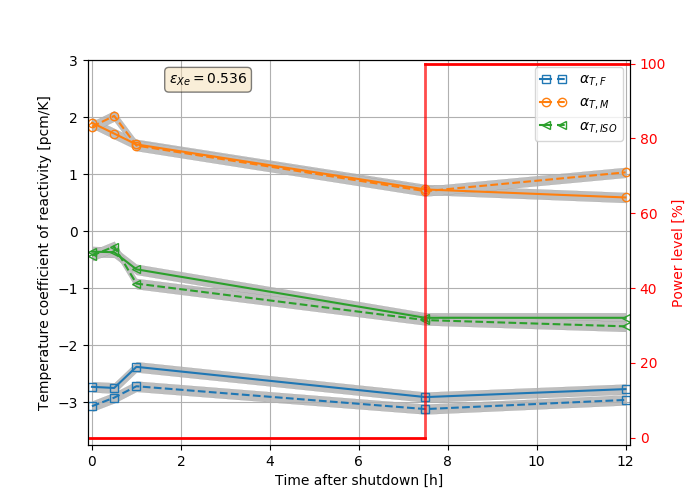

<IPython.core.display.Javascript object>


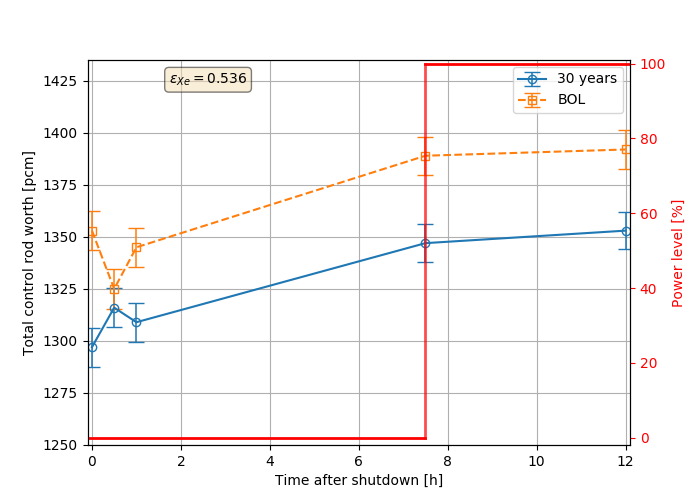

<IPython.core.display.Javascript object>


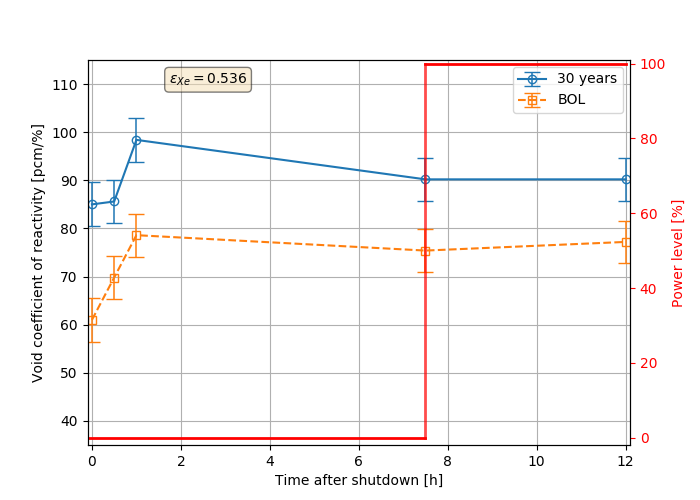

[-0.36 -0.37 -0.67 -1.52 -1.52]
[-0.43 -0.27 -0.92 -1.56 -1.67]
[0.09198475 0.0923319  0.09081513 0.08864647 0.08948684]
ITC raise after shutdown 2.777778%
Void coeff range 8.891424 % (BOL)
Void coeff range 5.334146 % (EOL)
[61.  69.8 78.6 75.4 77.2] [4.57481929 4.62630042 4.48189658 4.3397546  4.44564867]
[85.  85.6 98.4 90.2 90.2] [4.55702533 4.54111462 4.49677828 4.45008543 4.3968164 ]
[1353. 1325. 1345. 1389. 1392.]
[1297. 1316. 1309. 1347. 1353.]
[9.42325323 9.60176681 9.36343447 9.08007944 9.22510101]


In [3]:
t = np.array([0, 0.5, 1, 7.5, 12])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#textstr = r'$\epsilon_{Xe}=0.915$'
textstr = r'$\epsilon_{Xe}=0.536$'

#t_power  = np.array([0, 11,11.00001, 21])
#print(ftc_plot)
#print(mtc_plot)
#print(itc_plot)
#print(void_plot)
#print(crw_plot)
# Plot here
fig_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax1 = fig_2.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Time after shutdown [h]', fontsize=10)
ax1.set_ylabel(r'Temperature coefficient of reactivity [pcm/K]', fontsize=10)
# EOL
f1, = ax1.plot(t, ftc_plot[:,0], 's-',label=r'$\alpha_{T,F}$ (30 years)', markerfacecolor="None")
m1, = ax1.plot(t, mtc_plot[:,0], 'o-', label=r'$\alpha_{T,M}$ (30 years)', markerfacecolor="None")
i1, = ax1.plot(t, itc_plot[:,0], '<-', label=r'$\alpha_{T,ISO}$ (30 years)', markerfacecolor="None")
ax1.fill_between(t, ftc_plot[:,0]-ftc_plot[:,1], ftc_plot[:,0]+ftc_plot[:,1], edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(t, mtc_plot[:,0]-mtc_plot[:,1], mtc_plot[:,0]+mtc_plot[:,1], edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(t, itc_plot[:,0]-itc_plot[:,1], itc_plot[:,0]+itc_plot[:,1], edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
# BOL
ax1.set_prop_cycle(color=colors[0:])
f2, = ax1.plot(t, ftc_plot_bol[:,0], 's--',label=r'$\alpha_{T,F}$ (BOL)', markerfacecolor="None")
m2, = ax1.plot(t, mtc_plot_bol[:,0], 'o--', label=r'$\alpha_{T,M}(BOL)$', markerfacecolor="None")
i2, = ax1.plot(t, itc_plot_bol[:,0], '<--', label=r'$\alpha_{T,ISO}(BOL)$', markerfacecolor="None")
ax1.fill_between(t, ftc_plot_bol[:,0]-ftc_plot_bol[:,1], ftc_plot_bol[:,0]+ftc_plot_bol[:,1], edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(t, mtc_plot_bol[:,0]-mtc_plot_bol[:,1], mtc_plot_bol[:,0]+mtc_plot_bol[:,1], edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax1.fill_between(t, itc_plot_bol[:,0]-itc_plot_bol[:,1], itc_plot_bol[:,0]+itc_plot_bol[:,1], edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

#ax1.legend(loc='upper right', bbox_to_anchor=(0.2, 0.7))

l=ax1.legend([(f1,f2), (m1,m2), (i1,i2)], [r'$\alpha_{T,F}$', r'$\alpha_{T,M}$', r'$\alpha_{T,ISO}$'], scatterpoints=2,handler_map={tuple: HandlerTuple(ndivide=None)})

ax1.set_xlim(-0.1, 12.1)
ax1.set_ylim(-3.75, 3)
ax1.tick_params('both', labelsize=10)
ax1.text(0.15, 0.97, textstr,transform=ax1.transAxes,
        verticalalignment='top', bbox=props)

ax2=ax1.twinx()
ax2.plot([-0.1,7.5],[0, 0], c='red', alpha=1, linewidth=2)
ax2.plot([7.5,7.500001],[0, 100], c='red', alpha=0.7, linewidth=2)
ax2.plot([7.50001,21],[100, 100], c='red', alpha=1, linewidth=2)
ax2.set_ylim(-2,101)
ax2.set_ylabel('Power level [%]', color='r', fontsize=10)
ax2.tick_params('y', colors='r', labelsize=10)

fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch6/saf_par/tc_evo_kl25.png',bbox_inches='tight', dpi=700)

# Plot here
fig_3 = matplotlib.pyplot.figure(3, figsize=[7,5])
ax1 = fig_3.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Time after shutdown [h]', fontsize=10)
ax1.set_ylabel(r'Total control rod worth [pcm]', fontsize=10)
#ax1.plot(t, crw_plot_bol[:,0], 's--', markerfacecolor="None", label="BOL", color ='r')
#ax1.plot(t, crw_plot[:,0], 's-', markerfacecolor="None", label="30 years", color ='r')
ax1.errorbar(t, crw_plot[:,0], yerr=crw_plot[:,1], label="30 years", 
             ls='-', marker='o',elinewidth=1.1,capsize=6, markerfacecolor="None")
ax1.errorbar(t, crw_plot_bol[:,0], yerr=crw_plot_bol[:,1], label="BOL", 
             ls='--', marker='s',elinewidth=1.1,capsize=6, markerfacecolor="None")
ax1.legend(loc=1)
#ax1.legend(loc='upper right', bbox_to_anchor=(0.2, 0.7))
ax1.set_xlim(-0.1, 12.1)
ax1.set_ylim(1250, 1435)
ax1.tick_params('both', labelsize=10)

ax1.text(0.15, 0.97, textstr,transform=ax1.transAxes,
        verticalalignment='top', bbox=props)

ax2=ax1.twinx()
ax2.plot([-0.1,7.5],[0, 0], c='red', alpha=1, linewidth=2)
ax2.plot([7.5,7.500001],[0, 100], c='red', alpha=0.7, linewidth=2)
ax2.plot([7.50001,21],[100, 100], c='red', alpha=1, linewidth=2)
ax2.set_ylim(-2,101)
ax2.set_ylabel('Power level [%]', color='r', fontsize=10)
ax2.tick_params('y', colors='r', labelsize=10)

fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch6/saf_par/crw_evo_kl25.png',bbox_inches='tight', dpi=700)

# Plot here
fig_4 = matplotlib.pyplot.figure(4, figsize=[7,5])
ax1 = fig_4.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Time after shutdown [h]', fontsize=10)
ax1.set_ylabel(r'Void coefficient of reactivity [pcm/%]', fontsize=10)
ax1.errorbar(t, void_plot[:,0], yerr=void_plot[:,1], label="30 years", 
             ls='-', marker='o', capsize=6,elinewidth=1.1, markerfacecolor="None")
ax1.errorbar(t, void_plot_bol[:,0], yerr=void_plot[:,1], label="BOL", 
             ls='--', marker='s',capsize=6,elinewidth=1.1, markerfacecolor="None")
ax1.legend(loc=1)
#ax1.legend(loc='upper right', bbox_to_anchor=(0.2, 0.7))
ax1.set_xlim(-0.1, 12.1)
ax1.set_ylim(35, 115)
ax1.tick_params('both', labelsize=10)
ax1.text(0.15, 0.97, textstr,transform=ax1.transAxes,
        verticalalignment='top', bbox=props)

ax2=ax1.twinx()
ax2.plot([-0.1,7.5],[0, 0], c='red', alpha=1, linewidth=2)
ax2.plot([7.5,7.500001],[0, 100], c='red', alpha=0.7, linewidth=2)
ax2.plot([7.50001,12],[100, 100], c='red', alpha=1, linewidth=2)
ax2.set_ylim(-2,101)
ax2.set_ylabel('Power level [%]', color='r', fontsize=10)
ax2.tick_params('y', colors='r', labelsize=10)

fig_4.show()
#fig_4.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch6/saf_par/void_evo_kl25.png',bbox_inches='tight', dpi=700)
print(itc_plot[:,0])
print(itc_plot_bol[:,0])
print(itc_plot[:,1])
print("ITC raise after shutdown %f%%" %(100*(itc_plot[1,0]-itc_plot[0,0])/itc_plot[0,0]))
print("Void coeff range %f %% (BOL)" %(100*np.std(void_plot_bol[:,0])/np.mean(void_plot_bol[:,0])))
print("Void coeff range %f %% (EOL)" %(100*np.std(void_plot[:,0])/np.mean(void_plot[:,0])))
print(void_plot_bol[:,0], void_plot_bol[:,1])
print(void_plot[:,0], void_plot[:,1])
print(crw_plot_bol[:,0])
print(crw_plot[:,0])
print(crw_plot_bol[:,1])

# Calculations of geometry change

In [ ]:
fuel_den = 3.752-6.68e-4*(np.asarray(T)-273.15)
print("Fuel salt Density, g/cm3", fuel_den)

# Linear thermal expansion
a_l_graph = 1.3e-6    # 1/K [Robertson, 1971]
# If dL is small and expansion is isotropic:
a_v_graph = 3 * a_l_graph  # 1/K


# Grphite channel size
r_0 = 1.71069
d_0 = 4.953
D_0 = 5.08
h_0 = 449.58

T = np.array([800, 850, 900, 950, 1000])
T_base = 900
dT = T - T_base

den_graph_base = 1.843
den_graph = []
r = []
d = []
D = []
h = []

for t in dT:
    den_graph.append(den_graph_base/(1+t*a_v_graph))
    h.append(h_0*(1+a_l_graph*t))
    r.append(r_0*(1+a_l_graph*t))
    d.append(d_0*(1+a_l_graph*t))
    D.append(D_0*(1+a_l_graph*t))

for i in range(len(T)):
    print("At %4iK Graphite density  %4.15f g/cm3" % (T[i],den_graph[i]))
    

idx = 4
print("\n%% ----- Moderator at %4iK" %T[idx])
print("surf 1%i cyl    0.0 0.0 %4.9f" % (T[idx],r[idx]))
print("surf 2%i sqc    0.0 0.0 %4.9f  0.46" % (T[idx],d[idx]))
print("surf 3%i sqc    0.0 0.0 %4.9f" % (T[idx],D[idx]))
#print("surf 3%i sqc    0.0 0.0 %4.9f" % (T[idx],D[idx]))
print("\n")

# Void coefficient calculations

In [ ]:
rho_salt = 3.3332642  # g/cc
rho_he = 5.26e-5   # g/cc at T=900K
void_percent = np.linspace(0, 2, 5)


#void_percent = np.arange(0, 1.1, 0.1)/100
print('Void %', void_percent)
rho_mix = (1-(1/100)*void_percent)*rho_salt + (1/100)*void_percent * rho_he
print("Density of the salt+He bubbles [g/cm3]", rho_mix)
# print("2004.09c -%.14e" %(rho_he*void_percent/rho_salt))

# Void coefficient

In [ ]:
void_k = []
void_k_e = []
void_k_eol = []
void_k_e_eol = []


for i in [0, 13, 14, 15, 16]:
    void_k.append(keff[i]-keff[0])
    void_k_e.append(keff_err[i])
    void_k_eol.append(keff_eol[i]-keff_eol[0])
    void_k_e_eol.append(keff_err_eol[i])
    
    
print(void_k)
print(void_k_e)
print(void_percent)

av_r = stats.linregress(void_percent, void_k)
print(av_r)

# Initialize figure
fig_7 = matplotlib.pyplot.figure(6)
ax = fig_7.add_subplot(111)
ax.grid(True)
ax.plot(void_percent, void_k, 'o-', linewidth=1.5, markerfacecolor="None", label=r'BOL')
#ax.plot(void_percent, void_k_eol, 's-', linewidth=1.5, markerfacecolor="None", label=r'EOL')
#ax.plot(void_percent, av_r.intercept + av_r.slope * void_percent, '--', label=r'linear regression')
ax.fill_between(void_percent, np.asarray(void_k)-np.asarray(void_k_e), np.asarray(void_k)+np.asarray(void_k_e), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(void_percent, np.asarray(void_k_eol)-np.asarray(void_k_e_eol), np.asarray(void_k_eol)+np.asarray(void_k_e_eol), edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.set_ylabel(r'$\Delta \rho$ [$pcm$]')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))
ax.set_xlabel(r'$^2$He volume fraction [%]')
ax.set_xlim(-0.01, 2.01)
#ax.set_ylim(1.036, 1.038)
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
ax.legend(loc=0)

ax.text(1.17, 310, r'$\alpha_{V,BOL}=$%.1f$\pm$%.1f pcm/%%' %(156.2,5.1), fontsize=10, color=colors[0])
ax.text(1.17, 105, r'$\alpha_{V,EOL}=$%.1f$\pm$%.1f pcm/%%' %(95,4.5), fontsize=10, color=colors[1])


fig_7.show()
#fig_7.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/saf_par/void_coeff_bol_eol.png',bbox_inches='tight', dpi=700)
sim_a_v = (void_k[-1]-void_k[0])/(void_percent[-1]-void_percent[0])
sim_a_v_std = math.sqrt(void_k_e[0]**2/void_k[0]**4 + void_k_e[-1]**2/void_k[-1]**4) * \
            abs(1/(void_percent[-1]-void_percent[0]))

print(r'From Serpent $\alpha_v$ = %.2f +/- %.2f pcm/void%%' %(sim_a_v, sim_a_v_std))
print(r'Smoothed using linear regression $\alpha_v$ = %f pcm/void%%' %(av_r.slope))

## Load-following: safety parameters evolution

In [ ]:
hrs_lf = np.array([0, 0.041666701436042786, 0.08333340287208557])

# CRW pcm
crw_lf = np.array([3922,3975,4750,2930.2,2992.9,
                2787,3136,2697,2984,3755.2,2943.9,2559.2,
                2277,2002,1999.2,1977])
crw_err = np.array([10.8,9.62,9.55,9.48,9.548,
                    9.55,9.62,9.62,9.76,9.83,9.69,9.55,
                    9.27,9.12,9.12,9.27])

crw_d = np.array([5.058713,5.707562,7.158358,4.796545,5.195466,
                5.123275,6.014977,5.426286,6.135167,7.795465,6.323516,5.611149,
                5.083826,4.525460,4.471536])
crw_d_err = np.array([0.013962,0.013814,0.014396,0.015517,0.016575,
                    0.017552,0.018454,0.019357,0.020072,0.020408,0.020814,0.020935,
                    0.020687,0.020625,0.01456])

# Void pcm/void%
void_c = np.array([156.2,137,149,154,158.4,
                   153.4,143.6,151,138.2,131.8,133.6,130.6,
                   124.8,90.8,80.4,95])
void_err = np.array([5.03,4.4,4.33,4.35,4.37,
                     4.4,4.39,4.39,4.49,4.54,4.48,4.43,
                     4.29,4.23,4.33,4.5])

# pcm/K
ftc_arr = np.array([-0.35,-0.266,-0.434,-0.38,-0.46,
                    -0.59,-0.444,-0.274,-0.482,-0.524,-0.498,-0.426,
                    -0.496,-0.922,-0.968,-0.868])
ftc_arr_e = np.array([0.067387,0.0596,0.059210,0.0589,0.0596,
                      0.05919,0.0595,0.06048,0.061,0.060899,0.06,0.06,
                      0.058027,0.057194,0.0582,0.060142])

mtc_arr = np.array([-1.134,-1.118,-1.25,-1.554,-1.658,
                    -1.984,-2.152,-2.28,-2.19,-2.112,-1.756,-1.438,
                    -0.64,0.304,0.534,0.746])
mtc_arr_e = np.array([0.067196,0.05876,0.057912,0.058,0.058327,
                      0.05877,0.059,0.059561,0.06,0.060584,0.059,0.059256,
                      0.057311,0.058363,0.056116,0.060178])

itc_arr = np.array([-1.57,-1.452,-1.732,-1.992,-2.154,
                    -2.402,-2.534,-2.568,-2.66,-2.640000,-2.302,-1.728,
                    -1.172000,-0.444000,-0.46,-0.256000])
itc_arr_e = np.array([0.066712,0.0592,0.058354,0.058,0.058313,
                      0.0587,0.059,0.059104,0.06,0.060566,0.059325,0.059243,
                      0.057738,0.056525,0.057881,0.059685])